#**Projet : Emission de CO2 par les véhicules commercialisés**
# Nom du projet = **CO2 Predict**

## Emissions de polluants, CO2 et caractéristiques des véhicules commercialisés en France en 2013

## **Présentation du projet**

### **I. Description**: 
>1. Identifier les véhicules qui émettent le plus de CO2 est important pour identifier les caractéristiques techniques qui jouent un rôle dans la pollution. 
>2. Prédire à l’avance cette pollution permet de prévenir dans le cas de l’apparition de nouveaux types de véhicules (nouvelles séries de voitures par exemple)

### **II. Conditions de validation du projet:**
>
>Chargement et exploration exhaustif des données
>
>Analyse statistique et visualisations.
>
>Machine learning : 
>*   Prédiction du CO2
>*   Interprétabilité du modèle (SHAP)
>*   Demo Streamlit

### **III. Dataset:**
>
>Fichier data2013.csv: Emissions de CO2 et polluants des véhicules commercialisées en France
>
>Pourquoi?: difficultés techniques à travailler sur le dataset européen

## **Exploration des données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Recueil et observation des données

Approche des normes euros d'emissions de pollutants pour les véhicules (source : https://www.ecologie.gouv.fr/normes-euros-demissions-polluants-vehicules-lourds-vehicules-propres)



In [ ]:
import pandas as pd
import numpy as np
import streamlit as st

ModuleNotFoundError: ignored

In [ ]:
# Emissions de polluants, CO2 et caractéristiques des véhicules
# commercialisés en France en 2013
df_2013 = pd.read_csv('/content/drive/MyDrive/data2013.csv' , sep = ';', encoding='unicode_escape')

df_2013.head()

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


### Etat des lieux des données

In [ ]:
print(df_2013.info(), '\n')

# Détection des valeurs manquantes
print('Répartition des valeurs manquantes par variables')
display(df_2013.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44850 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44850 non-null  object 
 1   Modèle dossier                        44850 non-null  object 
 2   Modèle UTAC                           44850 non-null  object 
 3   Désignation commerciale               44850 non-null  object 
 4   CNIT                                  44850 non-null  object 
 5   Type Variante Version (TVV)           44850 non-null  object 
 6   Carburant                             44850 non-null  object 
 7   Hybride                               44850 non-null  object 
 8   Puissance administrative              44850 non-null  int64  
 9   Puissance maximale (kW)               44850 non-null  float64
 10  Boîte de vitesse                      44850 non-null  object 
 11  Consommation ur

Marque                                      0
Modèle dossier                              0
Modèle UTAC                                 0
Désignation commerciale                     0
CNIT                                        0
Type Variante Version (TVV)                 0
Carburant                                   0
Hybride                                     0
Puissance administrative                    0
Puissance maximale (kW)                     0
Boîte de vitesse                            0
Consommation urbaine (l/100km)             42
Consommation extra-urbaine (l/100km)       42
Consommation mixte (l/100km)               39
CO2 (g/km)                                 39
CO type I (g/km)                          303
HC (g/km)                               34447
NOX (g/km)                                303
HC+NOX (g/km)                           10659
Particules (g/km)                        3142
masse vide euro min (kg)                    0
masse vide euro max (kg)          

In [ ]:
# La variable cible est CO2 (g/km)
# On checke les doublons
print('Il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset')

Il y a  619 doublons dans le dataset


In [ ]:
# Suppression des doublons
df_2013 = df_2013.drop_duplicates()

In [ ]:
df_2013.duplicated().sum()

0

#### Question : Quelle stratégie pour les autres valeurs manquantes?

In [ ]:
# Détection des valeurs manquantes dans CO2:
print(df_2013['CO2 (g/km)'].isna().sum(),'valeurs manquantes CO2 dans le dataset')

# Détection des valeurs manquantes des véhicules électriques:
print(df_2013[df_2013['Carburant']=='EL'].isna().sum(),'valeurs manquantes CO2 pour les véhicules électriques')
print('Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques')

39 valeurs manquantes CO2 dans le dataset
Marque                                   0
Modèle dossier                           0
Modèle UTAC                              0
Désignation commerciale                  0
CNIT                                     0
Type Variante Version (TVV)              0
Carburant                                0
Hybride                                  0
Puissance administrative                 0
Puissance maximale (kW)                  0
Boîte de vitesse                         0
Consommation urbaine (l/100km)          39
Consommation extra-urbaine (l/100km)    39
Consommation mixte (l/100km)            39
CO2 (g/km)                              39
CO type I (g/km)                        39
HC (g/km)                               39
NOX (g/km)                              39
HC+NOX (g/km)                           39
Particules (g/km)                       39
masse vide euro min (kg)                 0
masse vide euro max (kg)                 0
Champ V9    

In [ ]:
# Remplacement de ces valeurs manquantes des 'EL' par 0:
df_2013['CO2 (g/km)'] = df_2013['CO2 (g/km)'].fillna(0)

# Vérification du bon remplacement:
df_2013['CO2 (g/km)'].isna().sum()

0

In [ ]:
# Les valeurs manquantes de consommation semblent coller avec celles des véhicules électriques
df_2013['Consommation urbaine (l/100km)'] = df_2013['Consommation urbaine (l/100km)'].fillna(0)
df_2013['Consommation extra-urbaine (l/100km)'] = df_2013['Consommation extra-urbaine (l/100km)'].fillna(0)
df_2013['Consommation mixte (l/100km)'] = df_2013['Consommation mixte (l/100km)'].fillna(0)

# Les valeurs manquantes des variables NOX (g/km), HC+NOX (g/km) et Particules (g/km) sont remplacées par des moyennes
df_2013['NOX (g/km)'] = df_2013['NOX (g/km)'].fillna(df_2013['NOX (g/km)'].mean())
df_2013['HC+NOX (g/km)'] = df_2013['HC+NOX (g/km)'].fillna(df_2013['HC+NOX (g/km)'].mean())
df_2013['Particules (g/km)'] = df_2013['Particules (g/km)'].fillna(df_2013['Particules (g/km)'].mean())
df_2013['CO type I (g/km)'] = df_2013['CO type I (g/km)'].fillna(df_2013['CO type I (g/km)'].mean())

# La variable HC (g/km) a près de 77% de valeurs manquantes. Elle ne sera pas retenue.
df_2013 = df_2013.drop(['HC (g/km)'], axis = 1)

# On vérifie le remplacement des valeurs manquantes des variables numériques
df_2013.isna().sum()

Marque                                   0
Modèle dossier                           0
Modèle UTAC                              0
Désignation commerciale                  0
CNIT                                     0
Type Variante Version (TVV)              0
Carburant                                0
Hybride                                  0
Puissance administrative                 0
Puissance maximale (kW)                  0
Boîte de vitesse                         0
Consommation urbaine (l/100km)           0
Consommation extra-urbaine (l/100km)     0
Consommation mixte (l/100km)             0
CO2 (g/km)                               0
CO type I (g/km)                         0
NOX (g/km)                               0
HC+NOX (g/km)                            0
Particules (g/km)                        0
masse vide euro min (kg)                 0
masse vide euro max (kg)                 0
Champ V9                                67
Date de mise à jour                      0
Carrosserie

### Revue statistique

In [ ]:
# Récapitulatif statistique des variables
df_2013.describe()
# Beaucoup de valeurs manquantes pour les variables HC (g/km) et HC+NOX (g/km)
# Les ordres de grandeurs sont très larges : il sera nécessaire de procéder à une standardisation des valeurs

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg)
count,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000,44231.000000
mean,11.067803,125.231815,9.688409,6.561478,7.706273,199.176256,0.151736,0.314705,0.225175,0.000963,2076.426353,2174.939906
std,5.568019,49.242734,2.339535,1.185714,1.579735,38.805952,0.137363,0.463887,0.036089,0.006281,335.292306,402.759649
min,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.001000,0.038000,0.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.300000,7.200000,189.000000,0.046000,0.164000,0.216000,0.000000,1976.000000,2075.000000
50%,10.000000,120.000000,9.800000,6.700000,7.700000,203.000000,0.093000,0.197000,0.225175,0.001000,2076.000000,2185.000000
75%,11.000000,125.000000,10.700000,7.100000,8.400000,221.000000,0.213000,0.228000,0.248000,0.001000,2255.000000,2355.000000
max,81.000000,559.300000,41.100000,14.900000,24.500000,572.000000,0.968000,1.846000,0.306000,0.610000,3115.000000,3115.000000


In [ ]:
# Répartition des voitures par marques
df_2013['Marque'].value_counts()
# On a une sur-représentation de la marque MERCEDES-BENZ dans le dataset

MERCEDES-BENZ                38282
VOLKSWAGEN                     900
BMW                            525
OPEL                           520
FIAT                           415
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
SMART                           52
HYUNDAI                         52
HONDA                           51
MAZDA               

In [ ]:
# Répartition des voitures par carburant
df_2013['Carburant'].value_counts()
# Il y a une sur-représentation des carburants GO (Gasoil)
# Il y a des carburants qui se répètent sous des appelations différentes (ES/GN et GN/ES, ES/GP et GP/ES)

GO       37680
ES        6108
EH         199
GN          59
GH          54
EL          39
ES/GN       23
GN/ES       23
ES/GP       17
GP/ES       17
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

In [ ]:
# Harmonisation des nomenclatures de carburants
df_2013['Carburant'] = df_2013['Carburant'].replace(to_replace = ['GN/ES', 'GP/ES'], value = ['ES/GN', 'ES/GP'])

# Nouveau count
df_2013['Carburant'].value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
ES/GN       46
EL          39
ES/GP       34
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

In [ ]:
# Corrélation entre les variables quantitatives
# Extraction des variables quantitatives
df_quant = df_2013[['Puissance administrative', 'Puissance maximale (kW)', 'Consommation urbaine (l/100km)', 'Consommation extra-urbaine (l/100km)', 'Consommation mixte (l/100km)', 'CO2 (g/km)', 'CO type I (g/km)', 'Particules (g/km)', 'NOX (g/km)', 'masse vide euro min (kg)', 'masse vide euro max (kg)']]

# Corrélation selon Pearson
df_quant.corr()

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),Particules (g/km),NOX (g/km),masse vide euro min (kg),masse vide euro max (kg)
Puissance administrative,1.000000,0.974372,0.672385,0.463157,0.588015,0.479430,0.312230,0.022864,-0.085760,0.079983,0.039577
Puissance maximale (kW),0.974372,1.000000,0.573208,0.350145,0.479758,0.361008,0.334819,0.019010,-0.124708,0.001898,-0.043026
Consommation urbaine (l/100km),0.672385,0.573208,1.000000,0.906289,0.979750,0.918300,0.074514,0.033563,0.097724,0.445524,0.429805
Consommation extra-urbaine (l/100km),0.463157,0.350145,0.906289,1.000000,0.971610,0.979575,-0.101570,0.053630,0.258584,0.677259,0.669691
Consommation mixte (l/100km),0.588015,0.479758,0.979750,0.971610,1.000000,0.970146,-0.006372,0.044675,0.177853,0.565112,0.553036
CO2 (g/km),0.479430,0.361008,0.918300,0.979575,0.970146,1.000000,-0.114873,0.044286,0.253542,0.685166,0.675109
CO type I (g/km),0.312230,0.334819,0.074514,-0.101570,-0.006372,-0.114873,1.000000,0.034910,-0.192924,-0.340779,-0.346350
Particules (g/km),0.022864,0.019010,0.033563,0.053630,0.044675,0.044286,0.034910,1.000000,0.116536,0.060696,0.068997
NOX (g/km),-0.085760,-0.124708,0.097724,0.258584,0.177853,0.253542,-0.192924,0.116536,1.000000,0.531764,0.596407
masse vide euro min (kg),0.079983,0.001898,0.445524,0.677259,0.565112,0.685166,-0.340779,0.060696,0.531764,1.000000,0.984621


In [ ]:
# Il apparaît qu'il y a une forte corrélation entre les différents types de consommation et les émissions de CO2 ce qui est normal
# Il y a aussi une corrélation marquée entre les masses des véhicules (min et max) et les émissions de CO2
# La variable HC+NOX (g/km) n'a pas été retenue car elle a trop de valeurs manquantes

In [ ]:
# Création d'une variable catégorielle 'Cat' selon la norme européenne de pollution des véhicules:

# Création d'une liste:
A = []

# Création d'une boucle identifiant les catégories (A à G) selon l'émission de CO2:
for i in df_2013['CO2 (g/km)']:
    if i<=100:
        A.append('A')
    if 100<i<=120:
        A.append('B')
    if 120<i<=140:
        A.append('C')
    if 140<i<=160:
        A.append('D')
    if 160<i<=200:
        A.append('E')
    if 200<i<250:
        A.append('F')
    if i>=250:
        A.append('G')

# Création d'une colonne 'Cat' dans le DataFrame df_2013:
df_2013['Cat'] = A 

df_2013['Cat']

0        E
1        C
2        C
3        C
4        C
        ..
44845    E
44846    C
44847    D
44848    C
44849    F
Name: Cat, Length: 44231, dtype: object

In [ ]:
# Gilles : Pour la création de la variable 'Cat', on pourrait utiliser pd.cut? A tester car plus simple qu'une boucle. 

###Définition des différents types d'energie de la carte grise

ES = Essence

GO = Gazoil

EH = Essence Hybride Non Rechargeable

EE = Essence Hybride Rechargeable

EL = Electrique

GH = Gazoil Hybride Non Rechargeable

ES/GP = GP/ES = Essence GPL

ES/GN = GN/ES = Essence Gaz Naturel

FE = Superethanol-E85

GN = Gaz Naturel (Vehicule)

GL = Gazoil Hybride Rechargeable

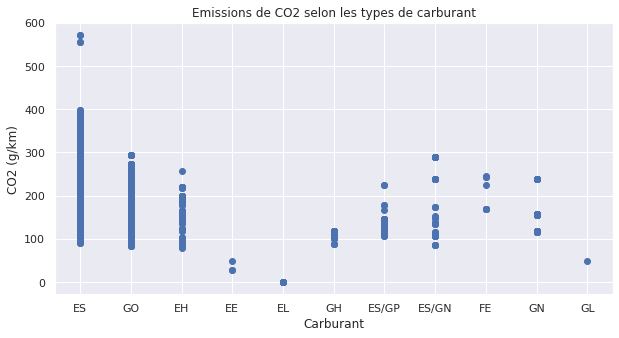

In [ ]:
# Impact à priori du carburant sur les émissions en CO2
# Import des packages pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme() # pour modifier le thème
plt.figure(figsize = (10, 5))
plt.scatter(df_2013['Carburant'], df_2013['CO2 (g/km)'])
plt.title('Emissions de CO2 selon les types de carburant')
plt.ylabel('CO2 (g/km)')
plt.xlabel('Carburant');

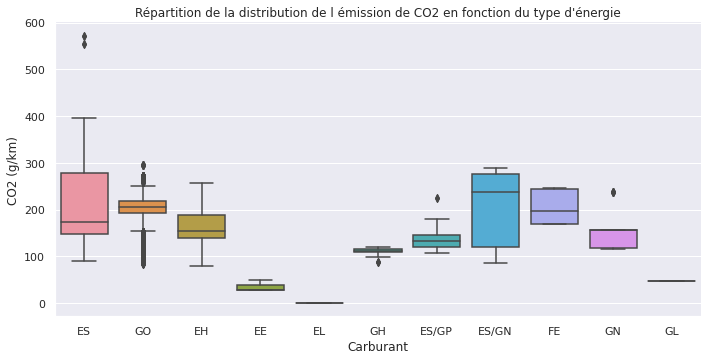

In [ ]:
# Les carburants de type ES semblent ceux ayant le plus fort taux d'emission de CO2
# Question : Comment agrandir la taille du graphe? (pour un sns.catplot)
# Réponse : avec les arguments height et aspect
# Exemple: j'ai transformé ton diagramme à point précédent en sns.catplot boxplot redimensionné:
sns.catplot(data = df_2013, x = 'Carburant', y = 'CO2 (g/km)', kind = 'box', height=5, aspect=2)
plt.title("Répartition de la distribution de l émission de CO2 en fonction du type d'énergie");

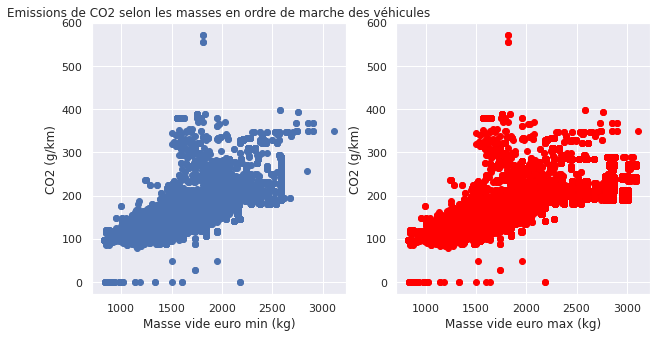

In [ ]:
# On a vu que la masses en ordre de marche pouvaient avoir un lien avec la conso
# On va tenter de visualiser cela
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_2013['masse vide euro min (kg)'], df_2013['CO2 (g/km)'])
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro min (kg)')
plt.title('Emissions de CO2 selon les masses en ordre de marche des véhicules')

plt.subplot(1, 2, 2)
plt.scatter(df_2013['masse vide euro max (kg)'], df_2013['CO2 (g/km)'], color= 'red')
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro max (kg)');

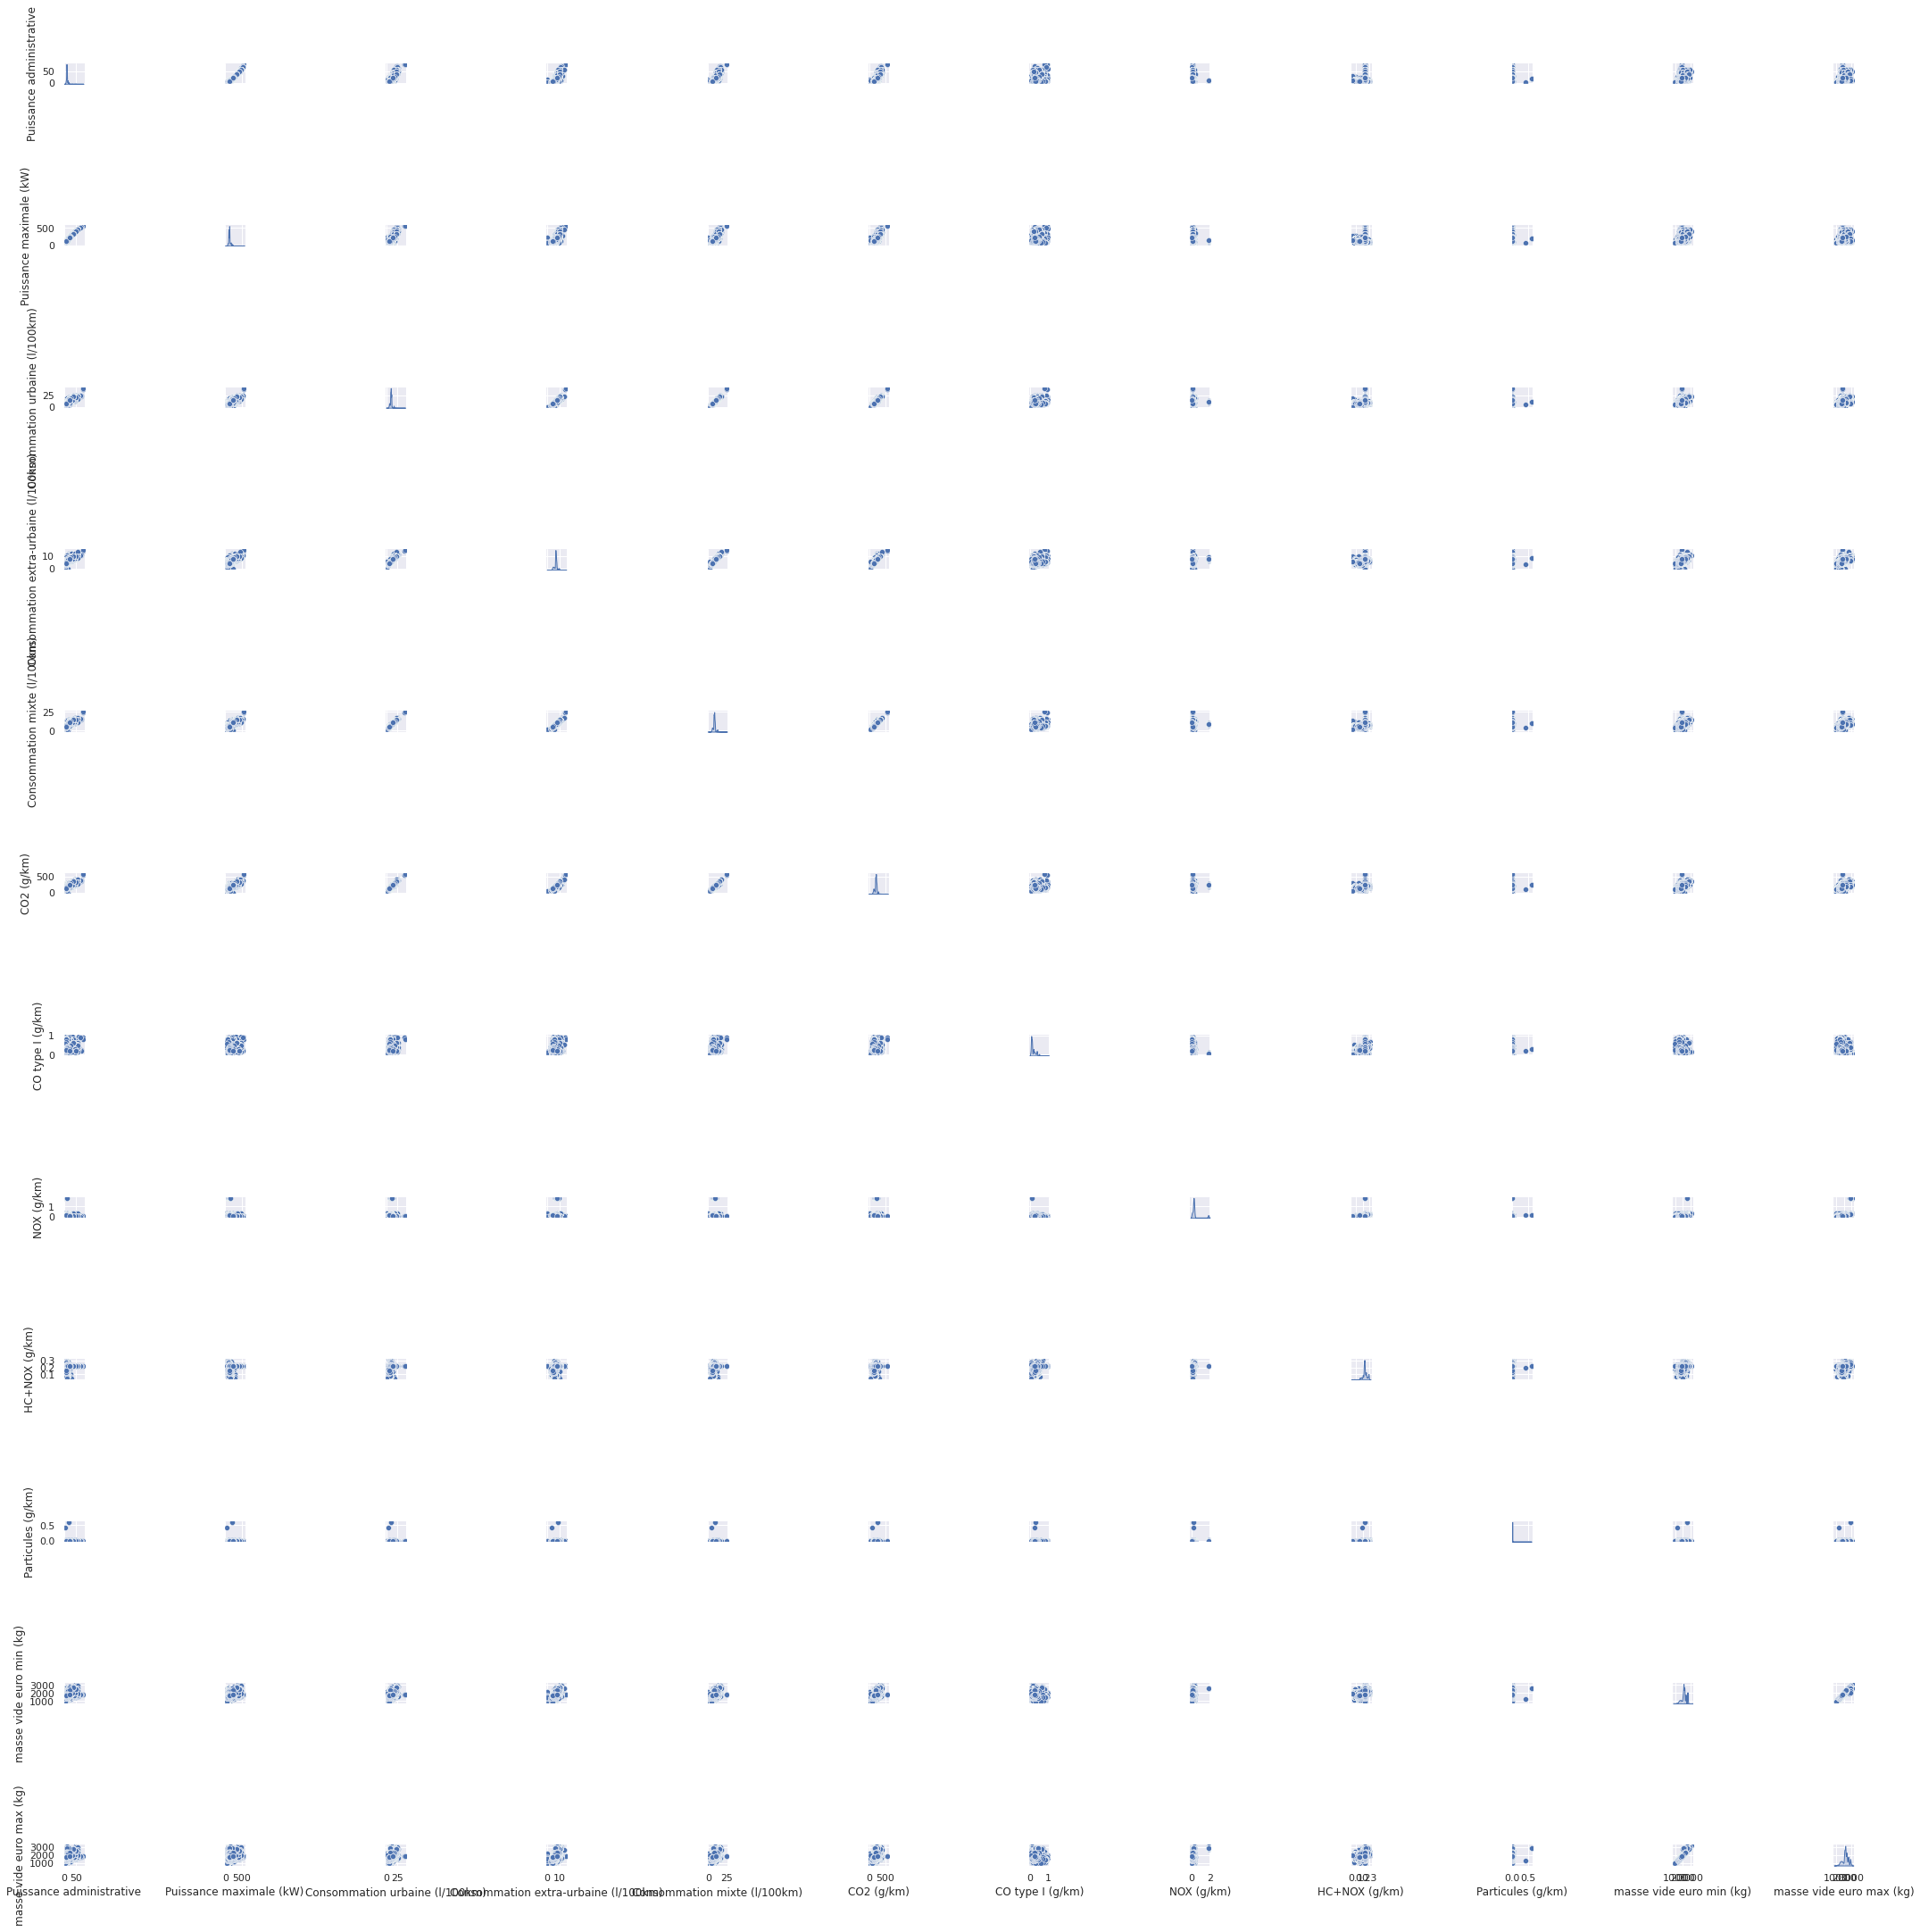

In [ ]:
# Pairplot pour les données numériques

sns.pairplot(data = df_2013, x_vars = ['Puissance administrative', 'Puissance maximale (kW)','Consommation urbaine (l/100km)',
       'Consommation extra-urbaine (l/100km)', 'Consommation mixte (l/100km)', 'CO2 (g/km)', 'CO type I (g/km)', 'NOX (g/km)',
       'HC+NOX (g/km)', 'Particules (g/km)', 'masse vide euro min (kg)',
       'masse vide euro max (kg)'], y_vars = ['Puissance administrative', 'Puissance maximale (kW)','Consommation urbaine (l/100km)',
       'Consommation extra-urbaine (l/100km)', 'Consommation mixte (l/100km)',
       'CO2 (g/km)', 'CO type I (g/km)', 'NOX (g/km)',
       'HC+NOX (g/km)', 'Particules (g/km)', 'masse vide euro min (kg)', 'masse vide euro max (kg)'], diag_kind = 'kde');

## **Analyse des variables quantitatives**

In [ ]:
# Import des packages pour la visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme() # pour modifier le thème

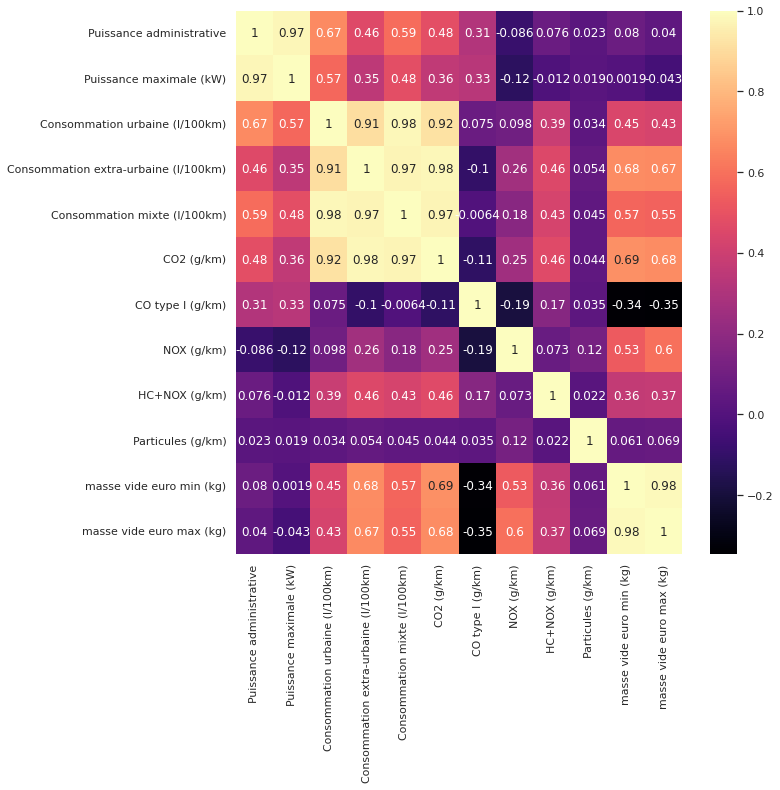

In [ ]:
# Corrélation entre les variables : affichage de la heatmap
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_2013.corr(), annot = True, ax = ax, cmap = 'magma');

### **Représentation graphique de l'indicateur CO2**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


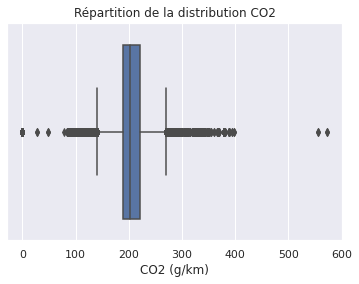

In [ ]:
# Répartition de la distribution CO2:
sns.boxplot(df_2013['CO2 (g/km)'])
plt.title('Répartition de la distribution CO2');
# 50% de la distribution est proche de 200 g/km
# peu de données pour des valeurs de CO2 inférieures à 189 g/km et supérieures à 221 g/km
# la distribution est très étendue allant de 0 à 600 g/km

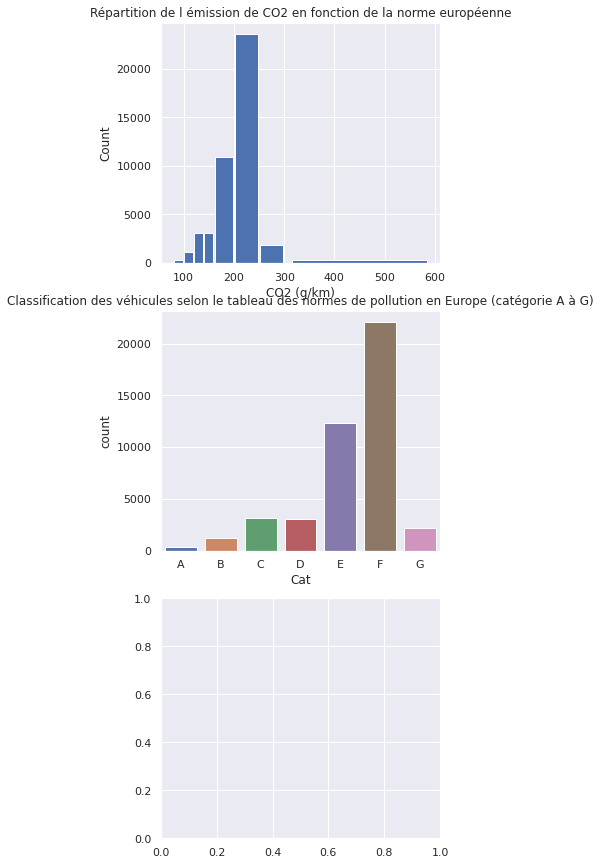

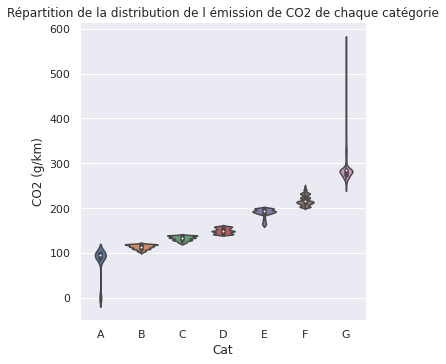

In [ ]:
plt.figure(figsize = (5, 15))

# Histogramme représentant la répartition de l'émission de CO2 des véhicules selon la norme européenne:
# Pas encore réussi à utiliser les mêmes couleurs que la norme
plt.subplot(3,1,1)
plt.hist(df_2013['CO2 (g/km)'], bins = [79,100,120,140,160,200,250,300,600], rwidth = 0.9)
plt.xlabel('CO2 (g/km)')
plt.ylabel('Count')
plt.title('Répartition de l émission de CO2 en fonction de la norme européenne')

# Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G):
# Pas encore réussi à utiliser les mêmes couleurs que la norme
plt.subplot(3,1,2)
sns.countplot(data = df_2013, x = 'Cat', order = ('A','B', 'C','D', 'E','F','G'))
plt.title('Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G)')

# Répartition de la distribution de l'émission de CO2 de chaque catégorie:
plt.subplot(3,1,3)
sns.catplot(data = df_2013, x = 'Cat', y = 'CO2 (g/km)', kind = 'violin', order = ('A','B', 'C','D', 'E','F','G'))
plt.title('Répartition de la distribution de l émission de CO2 de chaque catégorie');

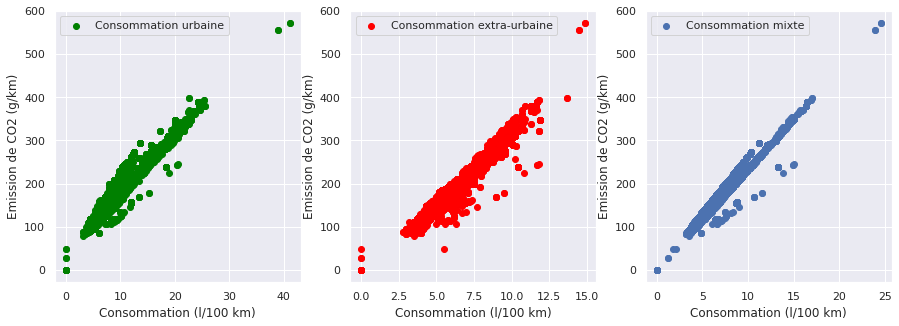

In [ ]:
# Relation entre les consommations et les émissions en CO2
plt.figure(figsize = (15, 5))
plt.title('Relation entre les consommations et les émissions en CO2')
plt.subplot(1, 3, 1)
plt.scatter(df_2013['Consommation urbaine (l/100km)'], df_2013['CO2 (g/km)'], label = 'Consommation urbaine', color = 'green')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df_2013['Consommation extra-urbaine (l/100km)'], df_2013['CO2 (g/km)'], label = 'Consommation extra-urbaine', color = 'red')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_2013['Consommation mixte (l/100km)'], df_2013['CO2 (g/km)'], label = 'Consommation mixte')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend();

In [ ]:
# Les graphes montrent une corrélation quasi-linéaire entre la consommation des véhicules et leurs niveaux d'émission en CO2

## **Analyse des variables qualitatives**

In [ ]:
#on commence par renommer toutes les variables pour supprimer les espaces gênants
df_2013.rename(columns = {'Modèle dossier':'modele_dossier', 
                          'Modèle UTAC':'modele_UTAC',
                          'Désignation commerciale':'design_comm',
                          'Boîte de vitesse':'boite0',
                          'CO2 (g/km)':'CO2'},inplace = True)
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44231 non-null  object 
 1   modele_dossier                        44231 non-null  object 
 2   modele_UTAC                           44231 non-null  object 
 3   design_comm                           44231 non-null  object 
 4   CNIT                                  44231 non-null  object 
 5   Type Variante Version (TVV)           44231 non-null  object 
 6   Carburant                             44231 non-null  object 
 7   Hybride                               44231 non-null  object 
 8   Puissance administrative              44231 non-null  int64  
 9   Puissance maximale (kW)               44231 non-null  float64
 10  boite0                                44231 non-null  object 
 11  Consommation ur

In [ ]:
#Analyse des marques
df_2013.Marque.value_counts()

MERCEDES-BENZ                38282
VOLKSWAGEN                     900
BMW                            525
OPEL                           520
FIAT                           415
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
SMART                           52
HYUNDAI                         52
HONDA                           51
MAZDA               

In [ ]:
#on créé des nouvelles variables qu'on enrichira des valeurs ci-desous
df_2013.insert(5,'cat','T')
df_2013.insert(6,'mq','T')
df_2013.insert(7,'genre','T')

#la variable CNIT génère beaucoup de doublons, à quoi correspond-t-elle?
#Variable CNIT
#les 3 premiers caractères représentent la catégorie
df_2013.cat=df_2013.CNIT.str[:3]

#les 3 suivants sont la marque
df_2013.mq=df_2013.CNIT.str[3:6]

#les 2 suivants le genre (VP dans la majeure partie des cas)
df_2013.genre=df_2013.CNIT.str[6:8]


In [ ]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44231 non-null  object 
 1   modele_dossier                        44231 non-null  object 
 2   modele_UTAC                           44231 non-null  object 
 3   design_comm                           44231 non-null  object 
 4   CNIT                                  44231 non-null  object 
 5   cat                                   44231 non-null  object 
 6   mq                                    44231 non-null  object 
 7   genre                                 44231 non-null  object 
 8   Type Variante Version (TVV)           44231 non-null  object 
 9   Carburant                             44231 non-null  object 
 10  Hybride                               44231 non-null  object 
 11  Puissance admin

Quelle est la différence entre Modèle dossier et Modèle UTAC?

In [ ]:
pd.crosstab(df_2013.modele_dossier,df_2013.modele_UTAC)

test_mod=df_2013[-(df_2013.modele_dossier==df_2013.modele_UTAC)]
pd.crosstab(test_mod.modele_dossier,test_mod.modele_UTAC)
 

modele_UTAC,114,116,118,120,123,125,130,135,2,3,...,X3,X5,X6,XF,XK,XV,YARIS,Z4,ZAFIRA,ZAGATO
modele_dossier,,,,,,,,,,,,,,,,,,,,,
2171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370Z ROADSTER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911 TURBO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKR COUPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
XKR-S CONVERTIBLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
XKR-S COUPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#quel modèle choisir?
test_mod.groupby(['Marque','modele_dossier','modele_UTAC']).size()

Marque        modele_dossier        modele_UTAC
ALFA-ROMEO    AR8C SPIDER           8C SPIDER       2
ASTON MARTIN  DB9 VOLANTE           DB9             4
              RAPIDE S              RAPIDE          2
              V12 VANTAGE           VANTAGE         2
              V12 VANTAGE ROADSTER  VANTAGE         2
                                                   ..
VOLKSWAGEN    CC                    PASSAT CC       8
              GOLF PLUS             GOLF            8
              MULTIVAN STARLINE     MULTIVAN        5
VOLVO         V40 CROSS COUNTRY     V40            11
              V60 HYBRID            V60             1
Length: 277, dtype: int64

Il faut encore chercher plus pour déterminer laquelle des deux prendre. le libellé mod semble moins précis. à retravailler

In [ ]:
#modifier la variable boite0

df_2013.boite0.value_counts()

M 6    19217
A 5    13602
A 7     8428
M 5     1191
A 6     1031
A 8      446
V 0      180
A 4       39
D 5       39
D 7       21
M 7       12
D 6       11
A 0       10
N 1        2
S 6        1
N 0        1
Name: boite0, dtype: int64

In [ ]:
#il faut éclater cette variable en 2 : type de boîte d'un côté et nombre de rapports de l'autre
#on créé des nouvelles variables qu'on enrichira des valeurs ci-desous

df_2013[['boite', 'rapport']]=df_2013.boite0.str.split(expand=True)
df_2013.head()


,Marque,modele_dossier,modele_UTAC,design_comm,CNIT,cat,mq,genre,Type Variante Version (TVV),Carburant,...,Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme,Cat,boite,rapport
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,M10,ALF,VP,939AXN1B52C,ES,...,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER,E,M,6
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,M10,ALF,VP,939AXP1B54C,GO,...,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,C,M,6
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,M10,ALF,VP,939AXR1B64,GO,...,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,C,M,6
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,M10,ALF,VP,939AXR1B64B,GO,...,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,C,M,6
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,M10,ALF,VP,939AXS1B66,GO,...,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,C,M,6


In [ ]:
df_2013[['Marque','modele_dossier','design_comm','CNIT','Type Variante Version (TVV)']].head()

,Marque,modele_dossier,design_comm,CNIT,Type Variante Version (TVV)
0,ALFA-ROMEO,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C
1,ALFA-ROMEO,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C
2,ALFA-ROMEO,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64
3,ALFA-ROMEO,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B
4,ALFA-ROMEO,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66


Maintenant que la base est modifiée, on regarde les liens avec la variable à expliquer
On commence par supprimer les CO2 manquants pour les liens avec celle-ci

In [ ]:
#on supprime les co2 manquants
df_2013=df_2013.dropna(subset=['CO2'])

df_2013.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44231 non-null  object 
 1   modele_dossier                        44231 non-null  object 
 2   modele_UTAC                           44231 non-null  object 
 3   design_comm                           44231 non-null  object 
 4   CNIT                                  44231 non-null  object 
 5   cat                                   44231 non-null  object 
 6   mq                                    44231 non-null  object 
 7   genre                                 44231 non-null  object 
 8   Type Variante Version (TVV)           44231 non-null  object 
 9   Carburant                             44231 non-null  object 
 10  Hybride                               44231 non-null  object 
 11  Puissance admin

In [ ]:
# On renomme la variable "Cat" pour éviter le doublon avec "cat"
df_2013.rename(columns = {'Cat' : 'cat_poll'}, inplace = True)

**Visualisation des variables:**

- Marque 
- Modele 
- Hybride
- Boite
- Carrosserie
- Gamme

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
#nombre de marques différents
df_2013.Marque.value_counts().size

51

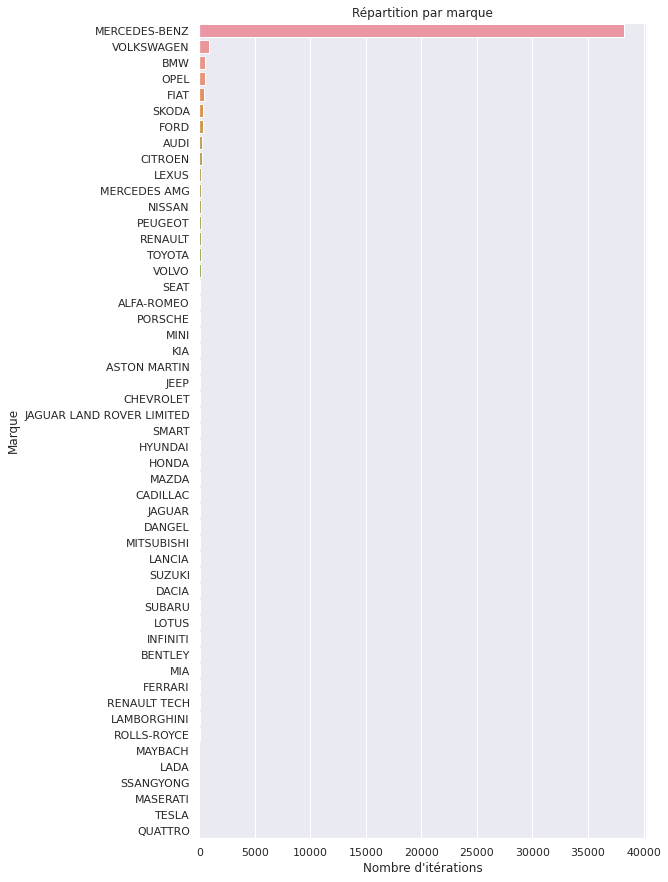

In [ ]:
#d'abord on regarde les marques sans faire de filtre, c'est illisible:
ax = plt.subplots(figsize=(8,15))
plot=sns.countplot(y='Marque',data=df_2013,order = df_2013.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque');
#plot.set(xlim=(0, 1000))

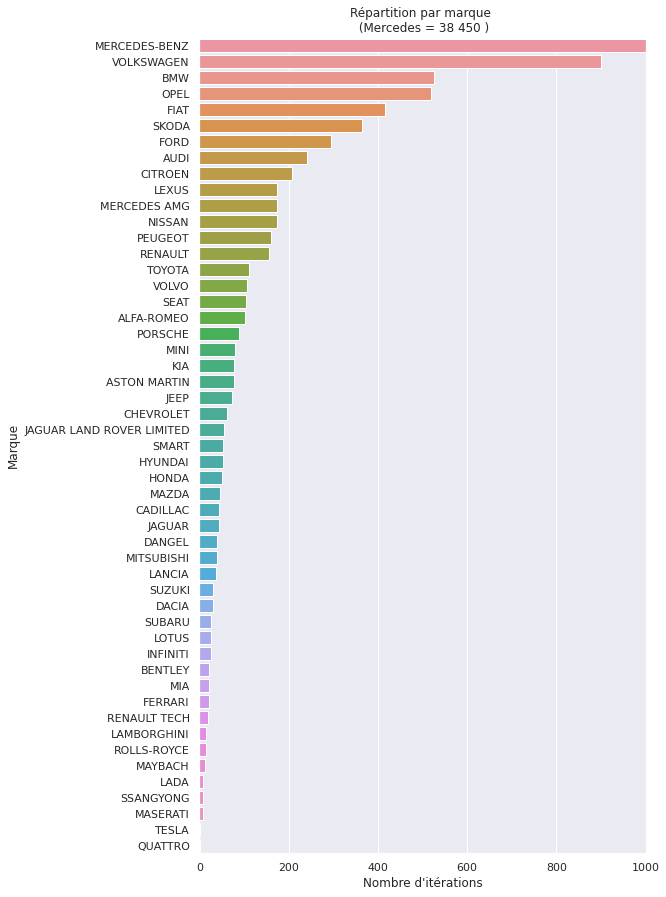

In [ ]:
#donc on maximise le x
ax = plt.subplots(figsize=(8,15))
plot=sns.countplot(y='Marque',data=df_2013, order = df_2013.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque \n (Mercedes = 38 450 )')
plot.set(xlim=(0, 1000));

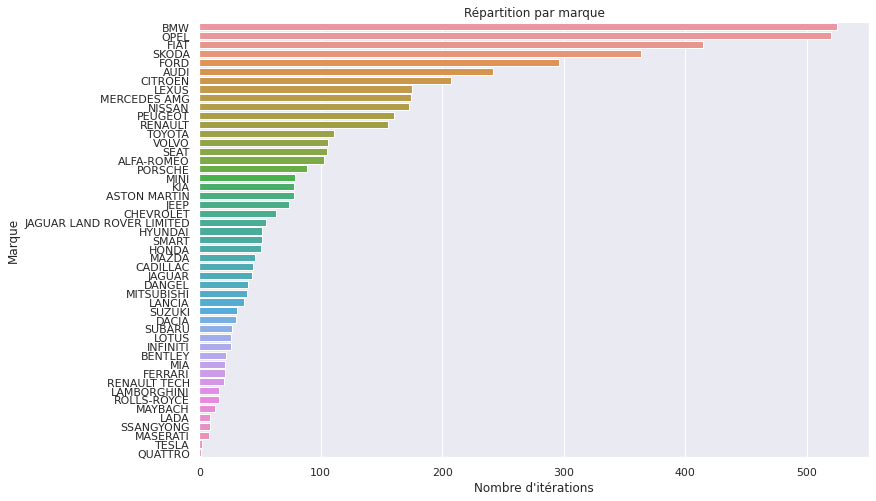

In [ ]:
#la visualisation avec Mercedes et Volkswagen n'est pas utile. pour les voir, on les supprime
test=df_2013.drop(df_2013[(df_2013.Marque =='MERCEDES-BENZ')|(df_2013.Marque =='VOLKSWAGEN')].index)
ax = plt.subplots(figsize=(12,8))
plot=sns.countplot(y='Marque',data=test,order = test['Marque'].value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque');


Répartition par modèle sur Mercedes pour comprendre

In [ ]:
#nombre de modèles différents
df_2013.modele_dossier.value_counts().size

458

In [ ]:
def graph_mod(marque_vehicule):
    table=df_2013[df_2013['Marque']==marque_vehicule]
    ax = plt.subplots(figsize=(12,8))
    plot=sns.countplot(y='modele_dossier',data=table,order = table.modele_dossier.value_counts().index)
    plot.set_xlabel("Nombre d'itérations")
    plot.set(title=marque_vehicule);    

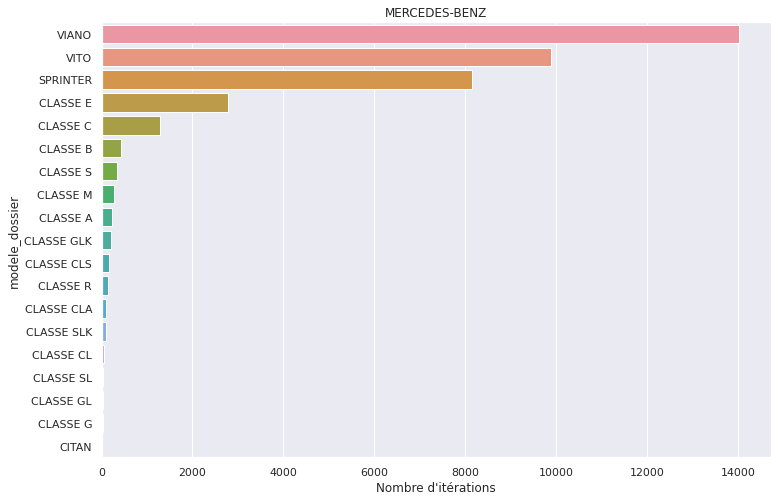

In [ ]:
graph_mod('MERCEDES-BENZ')

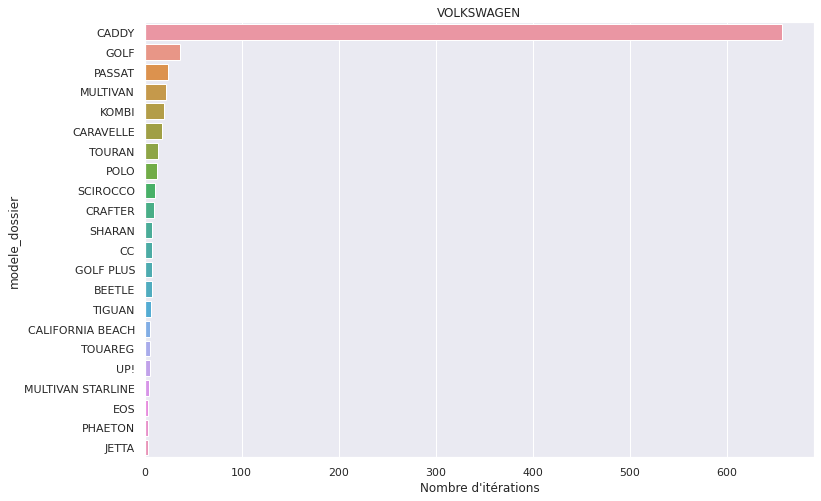

In [ ]:
graph_mod('VOLKSWAGEN')

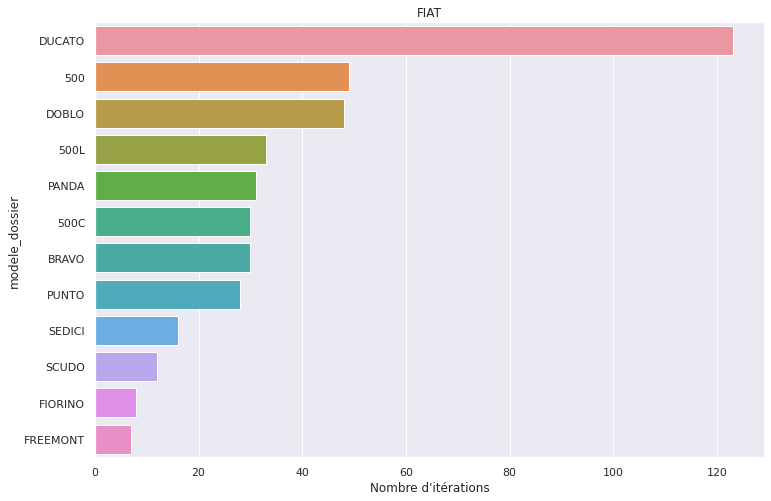

In [ ]:
graph_mod('FIAT')

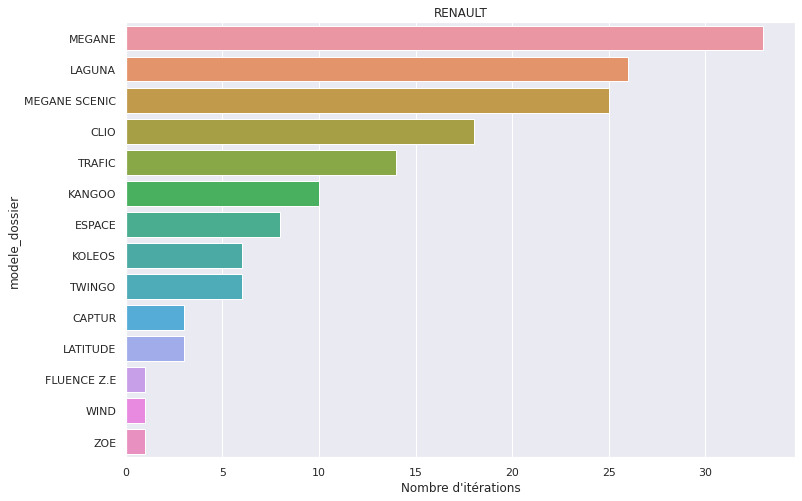

In [ ]:
graph_mod('RENAULT')

In [ ]:
import statsmodels.api

#ANOVA marques
result = statsmodels.formula.api.ols('CO2 ~ Marque', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,df,sum_sq,mean_sq,F,PR(>F)
Marque,50.0,1.935608e+07,387121.640940,361.969283,0.0
Residual,44180.0,4.724996e+07,1069.487548,NaN,NaN


In [ ]:


#ANOVA modèles
result = statsmodels.formula.api.ols('CO2 ~ modele_dossier', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
modele_dossier,457.0,4.650650e+07,101764.780473,221.624492,0.0
Residual,43773.0,2.009954e+07,459.176598,NaN,NaN


Hybrides

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


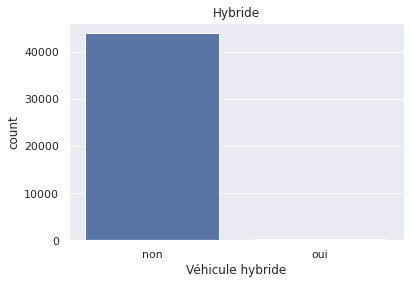

In [ ]:

plt.xlabel('Hybride')
plot_hybride=sns.countplot(df_2013.Hybride)
plot_hybride.set_xlabel("Véhicule hybride")
plot_hybride.set(title='Hybride');

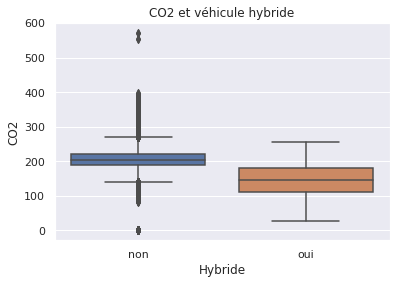

In [ ]:
ax = sns.boxplot(x='Hybride',y='CO2',data=df_2013)
ax.set(title='CO2 et véhicule hybride');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


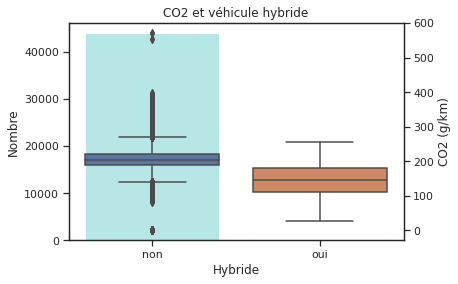

In [ ]:

sns.set_style("ticks")


fig, ax = plt.subplots()

sns.countplot(df_2013.Hybride,color='paleturquoise',ax=ax)
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='Hybride',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et véhicule hybride')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [ ]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Hybride', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Hybride,1.0,7.989100e+05,798910.012333,536.947743,4.406986e-118
Residual,44229.0,6.580713e+07,1487.872932,NaN,NaN


Gamme de véhicule (supérieure, luxe, inférieure, économique)

In [ ]:
df_2013.insert(10,'gamme2','T')

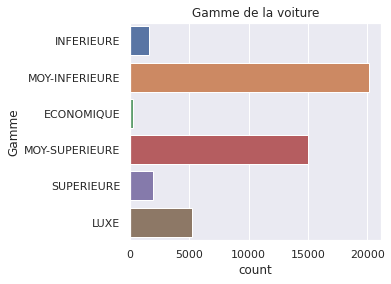

In [ ]:

#on modifie les labels qui ne vont pas
def change_gamme(x):
    if x in ['MOY-INFERIEURE','MOY-INFER','MOY-INF']:
        return('MOY-INFERIEURE')
    if x in ['MOY-SUPER']:
        return('MOY-SUPERIEURE')
    else : return(x)


df_2013['gamme2']=df_2013.gamme.apply(change_gamme)

df_2013.gamme2.value_counts()
ordre=['INFERIEURE','MOY-INFERIEURE','ECONOMIQUE','MOY-SUPERIEURE','SUPERIEURE','LUXE']

plot_gamme=sns.countplot(y=df_2013.gamme2,order=ordre)
plot_gamme.set(title='Gamme de la voiture')
plt.ylabel('Gamme');

In [ ]:
df_2013.gamme2.value_counts()

MOY-INFERIEURE    20171
MOY-SUPERIEURE    15040
LUXE               5223
SUPERIEURE         1956
INFERIEURE         1622
ECONOMIQUE          219
Name: gamme2, dtype: int64

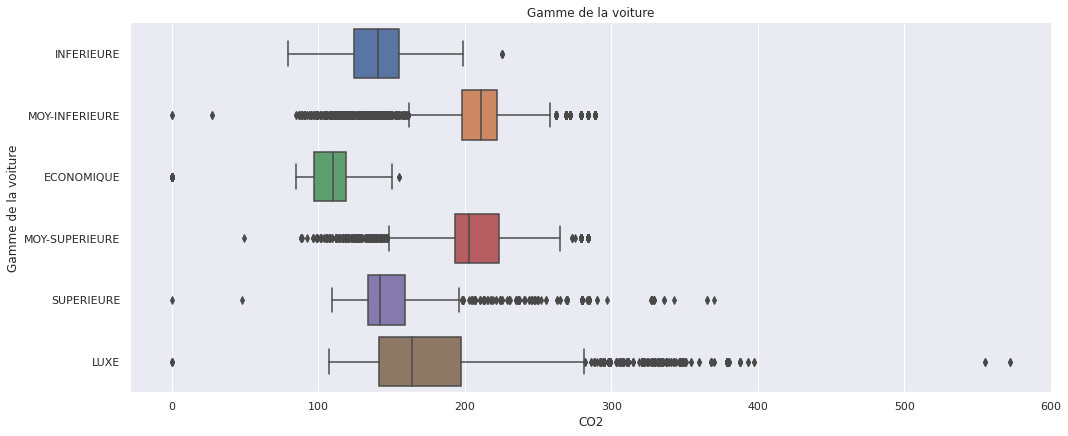

In [ ]:
plot2=sns.catplot(y='gamme2',x='CO2',kind='box',data=df_2013, height=6, aspect=15/6,order=ordre);
plot2.set(title='Gamme de la voiture')
plot2.set(ylabel='Gamme de la voiture');

In [ ]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ gamme2', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
gamme2,5.0,1.674288e+07,3.348575e+06,2969.942763,0.0
Residual,44225.0,4.986317e+07,1.127488e+03,NaN,NaN


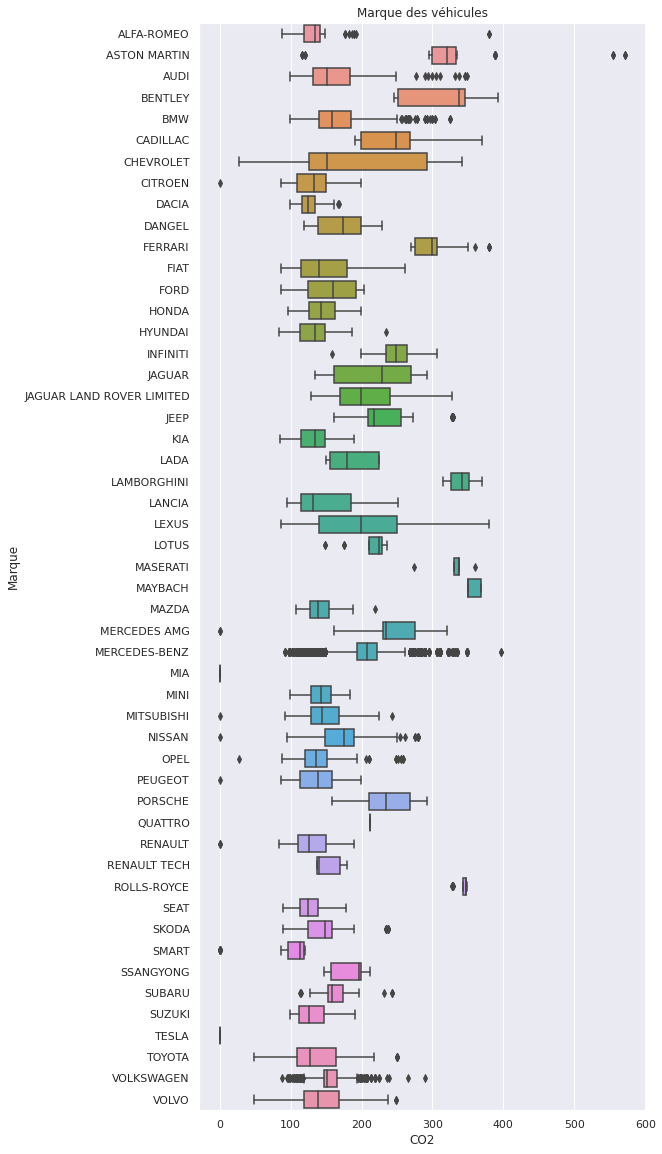

In [ ]:
plt.figure(figsize = (8,20))
ax = sns.boxplot(y='Marque',x='CO2',data=df_2013)
ax.set(title='Marque des véhicules');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

Carrosserie

In [ ]:
df_2013.Carrosserie.value_counts()

MINIBUS                32576
BERLINE                 4762
BREAK                   2229
TS TERRAINS/CHEMINS     1176
COUPE                   1104
COMBISPACE               901
CABRIOLET                611
MONOSPACE COMPACT        610
MINISPACE                147
MONOSPACE                115
Name: Carrosserie, dtype: int64

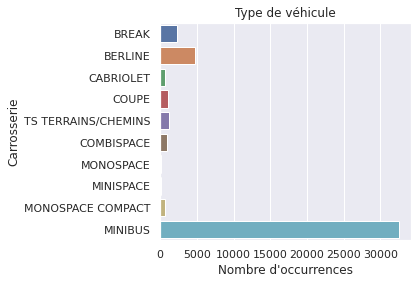

In [ ]:
plt.ylabel('Carrosserie')
plot_car2=sns.countplot(y=df_2013.Carrosserie)
plot_car2.set_xlabel("Nombre d'occurrences")
plot_car2.set(title='Type de véhicule');

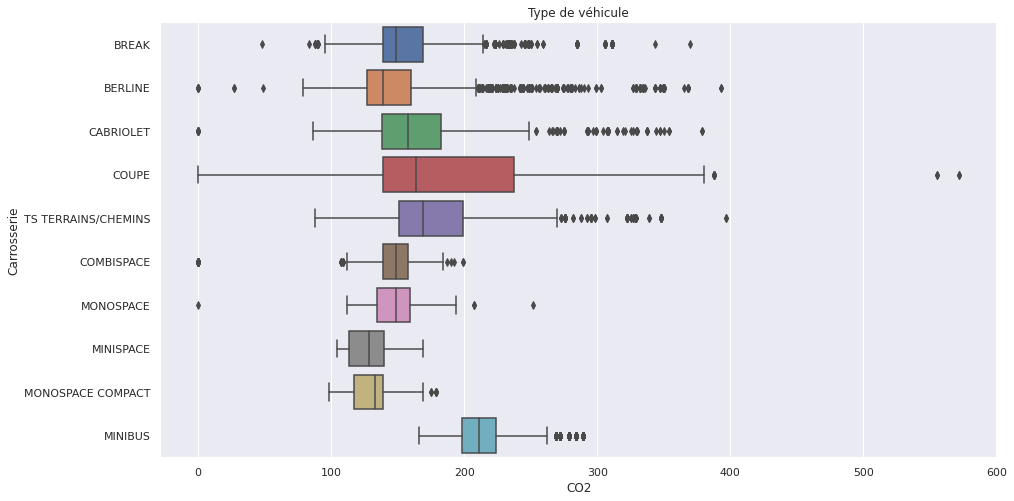

In [ ]:

plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carrosserie',x='CO2',data=df_2013)
ax.set(title='Type de véhicule');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [ ]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carrosserie', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Carrosserie,9.0,2.940006e+07,3.266674e+06,3882.590272,0.0
Residual,44221.0,3.720598e+07,8.413645e+02,NaN,NaN


Boîte

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


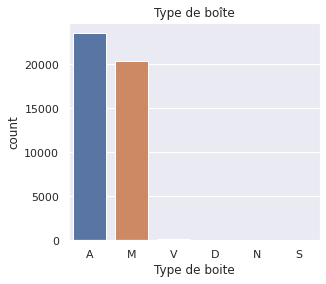

In [ ]:
plt.xlabel('Boîte de vitesse')
plot_hybride=sns.countplot(df_2013.boite, order = df_2013.boite.value_counts().index)
plot_hybride.set_xlabel("Type de boite")
plot_hybride.set(title='Type de boîte');

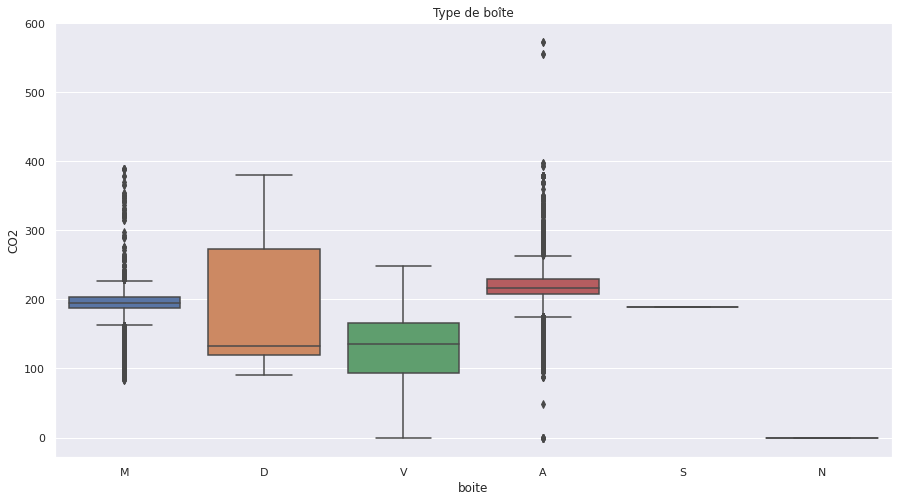

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.boxplot(x='boite',y='CO2',data=df_2013)
ax.set(title='Type de boîte');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


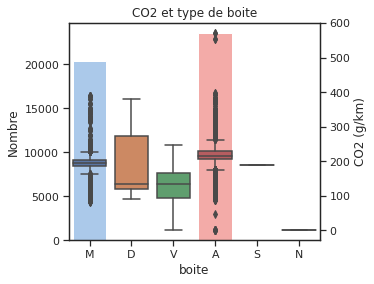

In [ ]:
sns.set_style("ticks")

fig, ax = plt.subplots()

sns.countplot(df_2013.boite,ax=ax,palette='pastel')
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='boite',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et type de boite')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [ ]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ boite', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
boite,5.0,8.188733e+06,1.637747e+06,1239.861072,0.0
Residual,44225.0,5.841731e+07,1.320911e+03,NaN,NaN


In [ ]:
df_2013['boite'].value_counts()

A    23556
M    20420
V      180
D       71
N        3
S        1
Name: boite, dtype: int64

In [ ]:
# Regroupement des modalités en sous-nombres sous la valeur "Autres"
df_2013['boite'].replace(to_replace = ['V', 'D', 'N', 'S'], value = 'Autres', inplace = True)
# La modalité D semble être automatique
# Il faudrait retirer les voitures électriques du lot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


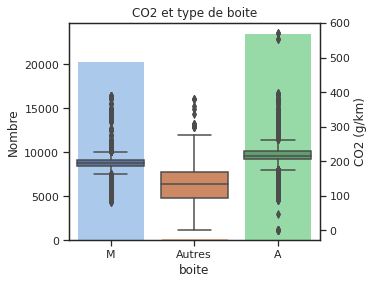

In [ ]:
sns.set_style("ticks")

fig, ax = plt.subplots()

sns.countplot(df_2013.boite,ax=ax,palette='pastel')
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='boite',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et type de boite')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [ ]:
# Exploitation de la variable Champ V9 : permet de ressortir la norme EURO
df_2013['Champ V9'].replace(to_replace = [np.nan], value = [df_2013['Champ V9'].mode()], inplace = True) # Remplacement des valeurs manquantes par le mode
df_2013['norme EURO'] = df_2013['Champ V9'].apply(lambda x: x[-5:])
df_2013['norme EURO'].head()

0    EURO5
1    EURO5
2    EURO5
3    EURO5
4    EURO5
Name: norme EURO, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


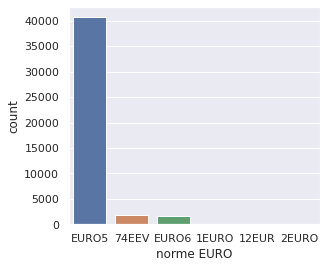

In [ ]:
plot_norme=sns.countplot(df_2013['norme EURO'], order = df_2013['norme EURO'].value_counts().index)
plot_norme.set_xlabel("norme EURO")
plot_hybride.set(title='Répartition des véhicules selon la norme EURO');
# Il y a une sur-représentation de véhicules avec la norme EURO5

In [ ]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Marque                                44231 non-null  object 
 1   modele_dossier                        44231 non-null  object 
 2   modele_UTAC                           44231 non-null  object 
 3   design_comm                           44231 non-null  object 
 4   CNIT                                  44231 non-null  object 
 5   cat                                   44231 non-null  object 
 6   mq                                    44231 non-null  object 
 7   genre                                 44231 non-null  object 
 8   Type Variante Version (TVV)           44231 non-null  object 
 9   Carburant                             44231 non-null  object 
 10  gamme2                                44231 non-null  object 
 11  Hybride        

### Sélection des variables utiles

In [ ]:
# On ne conserve que les variables qui vont être utiles pour la modélisation
# Les variables corrélées entre-elles sont aussi délaissées

df = df_2013.drop(columns = ['modele_dossier', 'modele_UTAC', 'design_comm', 'CNIT', "Type Variante Version (TVV)", 'Puissance administrative', 
                                 'boite0', 'Consommation extra-urbaine (l/100km)', 'Consommation mixte (l/100km)', 'CO type I (g/km)', 'NOX (g/km)', 
                                 'Particules (g/km)', 'masse vide euro max (kg)', 'Champ V9', 'Date de mise à jour', 'gamme'])

In [ ]:
df.info()
# Pour la classification multiple : notre variable cible sera cat_poll pour la classification des véhicules selon les catégories polluantes de A à G
# Pour la regression multiple : notre variable cible sera CO2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marque                          44231 non-null  object 
 1   cat                             44231 non-null  object 
 2   mq                              44231 non-null  object 
 3   genre                           44231 non-null  object 
 4   Carburant                       44231 non-null  object 
 5   gamme2                          44231 non-null  object 
 6   Hybride                         44231 non-null  object 
 7   Puissance maximale (kW)         44231 non-null  float64
 8   Consommation urbaine (l/100km)  44231 non-null  float64
 9   CO2                             44231 non-null  float64
 10  HC+NOX (g/km)                   44231 non-null  float64
 11  masse vide euro min (kg)        44231 non-null  int64  
 12  Carrosserie                     

In [ ]:
#df.to_csv('ML_C02.csv')
# Le df ainsi obtenu pour la modélisation est enregistré dans un nouveau document ML_CO2.csv
# Il sera utilisé pour la classification multiple

In [ ]:
df.to_csv('ML_C02_reg.csv')
# Le df ainsi obtenu pour la modélisation est enregistré dans un nouveau document ML_CO2_reg.csv
# Il sera utilisé pour la regression multiple

In [ ]:
df.head()

,Marque,cat,mq,genre,Carburant,gamme2,Hybride,Puissance maximale (kW),Consommation urbaine (l/100km),CO2,HC+NOX (g/km),masse vide euro min (kg),Carrosserie,cat_poll,boite,rapport,norme EURO
0,ALFA-ROMEO,M10,ALF,VP,ES,MOY-SUPERIEURE,non,147.0,11.3,182.0,0.225175,1505,BREAK,E,M,6,EURO5
1,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,125.0,6.6,136.0,0.190000,1565,BERLINE,C,M,6,EURO5
2,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,100.0,6.6,134.0,0.175000,1565,BERLINE,C,M,6,EURO5
3,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,100.0,6.6,134.0,0.175000,1565,BERLINE,C,M,6,EURO5
4,ALFA-ROMEO,M10,ALF,VP,GO,MOY-SUPERIEURE,non,125.0,6.9,139.0,0.193000,1565,BERLINE,C,M,6,EURO5


## **MACHINE LEARNING - Classification multiple**`
## Déterminer la classe du véhicule selon les normes européennes

### Import des librairies utiles

In [ ]:
# Les différents types de modèles de Machine Learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Les fonctions de paramétrage de la modélisation
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import GridSearchCV

# Les fonctions de preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Les algos de rééchantillonnage (Dataset déséquilibré)
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

# Les métriques
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### **Cas 1 : Modélisation sans les variables qualitatives**

#### Classification multiple pour Dataset déséquilibré

In [ ]:
# Distribution de la variable cible
target.value_counts(normalize = True)
# On a bien une distribution déséquilibrée avec près de la moitié des valeurs présentes dans une seule classe

NameError: ignored

In [ ]:
df_imb.head()

In [ ]:
# On ne conserve que les variables quantitatives pour effectuer la modélisation
feats_quant = feats[['Consommation urbaine (l/100km)', 'Puissance maximale (kW)', 'HC+NOX (g/km)', 'masse vide euro min (kg)']]

In [ ]:
# Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(feats_quant, target, test_size = 0.25) # Question : Faut-il rajouter un paramètre random_state?

# Normalisation des données
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

##### Oversampling avec RandomOverSampler

In [ ]:
(X_ro, y_ro) = RandomOverSampler().fit_resample(X_train, y_train)

# On vérifie qu'on a bien rééquilibré la cible
print(y_ro.value_counts())

###### Classifieur SVC

In [ ]:
# Instanciation du classifieur
clf_svc = SVC(gamma = 'scale')

clf_svc.fit(X_ro, y_ro)          # Entraînement du classifieur

y_pred_svc = clf_svc.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# La matrice de confusion semble donner des résultats intéressants
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_svc))

In [ ]:
# Les scores sont plutôt bons avec le classifieur SVC, le modèle à des valeurs de f1-score et geometric mean élevées
# Les voitures de la classe 4 sont les moins bien classées

###### Classifieur KNN

In [ ]:
# Instanciation du classifieur
clf_knn = KNeighborsClassifier()

clf_knn.fit(X_ro, y_ro)          # Entraînement du classifieur

y_pred_knn = clf_knn.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


In [ ]:
# La matrice de confusion semble donner des résultats quasi-parfaits!
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_knn))

In [ ]:
# Les scores obtenus sont très élevés
# Même les voitures de la classe 4 sont bien classées
# Meilleurs résultats qu'avec le SVC
# Tester s'il n'y a pas un phénomène d'overfitting

###### Classifieur Random Forest

In [ ]:
# Instanciation du classifieur
clf_rf = RandomForestClassifier()

clf_rf.fit(X_ro, y_ro)          # Entraînement du classifieur

y_pred_rf = clf_rf.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

In [ ]:
# La matrice de confusion semble donner des résultats XXX
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_rf))

In [ ]:
# Ici aussi les scores sont très élevés
# Les voitures de classe 4 sont bien déterminées
# Meilleurs scores qu'avec le SVC
# Checker aussi s'il n'y a pas d'overfitting
# Il faudrait intégrer des données de validation pour tester la performance réelle du modèle

###### Voting Classifier

In [ ]:
# Instanciation du classifieur
clf_vc = VotingClassifier([('rf', clf_rf), ('svc', clf_svc), ('knn', clf_knn)], voting = 'soft')

# Création du cross-validator
cv3 = KFold(n_splits = 3) # Question : comment choisir les autres paramètres du CV? Comment définir le nombre optimal de splits?

# Validation croisée et évaluation des classifieurs
for clf, label in zip([clf_rf, clf_svc, clf_knn, clf_vc], ['Random Forest', 'SVC', 'KNN', 'Voting Classifier']):
    scores = cross_validate(clf, feats_quant, target, cv=cv3, scoring=['accuracy','f1_weighted'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))
    
# Pour debuguer

In [ ]:
# Instanciation du classifieur
clf_vc = VotingClassifier([('rf', clf_rf), ('svc', clf_svc), ('knn', clf_knn)], voting = 'soft')

In [ ]:
clf_vc.fit_transform(feats_quant, target)

In [ ]:
clf_vc.predict(feats_quant)

In [ ]:
# En regardant les chiffres de l'oversampling, on peut se demander s'il n'y a pas un biais qui est induit de cette façon
# Le nombre d'échantillons des classes avec peu d'effectifs est trop surévalué
# Question : Est-il nécessaire de conserver les classes peu représentées?

##### Oversampling avec SMOTE

In [ ]:
(X_sm, y_sm) = SMOTE().fit_resample(X_train, y_train)

# On vérifie qu'on a bien rééquilibré la cible
print(y_sm.value_counts())

###### Classifieur SVC

In [ ]:
# Instanciation du classifieur pour SMOTE
clf_svc_sm = SVC(gamma = 'scale')

clf_svc_sm.fit(X_sm, y_sm)          # Entraînement du classifieur

y_pred_sm = clf_svc_sm.predict(X_test) # Prédictions du classifieur

pd.crosstab(y_test, y_pred_sm, rownames = ['Classes réelles'], colnames = ['Classes prédites'])

In [ ]:
# La matrice de confusion semble aussi donner des résultats intéressants
# On affiche les métriques dans le rapport
print(classification_report_imbalanced(y_test, y_pred_sm))

# Les scores sont un peu meilleurs qu'avec le RandomOverSampler : la précision moyenne est plus élevée
# le modèle a toujours des valeurs de f1-score et geometric mean élevées
# Les voitures des la classe 4 restent les moins bien classées

##### Undersampling avec RandomUnderSampler

In [ ]:
X_ru, y_ru = RandomUnderSampler().fit_resample(X_train, y_train)

# On vérifie qu'on a bien rééquilibré la cible
print(y_ru.value_counts())

###### Classifieur SVC

In [ ]:
clf_SVC_ru = SVC(gamma = 'scale')

clf_SVC_ru.fit(X_ru, y_ru)

y_pred_ru = clf_SVC_ru.predict(X_test)

pd.crosstab(y_test, y_pred_ru, rownames = ['Classes réelles'], colnames = ['Classes prédites'])

In [ ]:
print(classification_report_imbalanced(y_test, y_pred_ru))

In [ ]:
# On a remarqué que les temps de traitement étaient plus longs avec les techniques d'Oversampling mais avec des scores plus élevés
# Le nombre d'échantillons obtenus avec l'undersampling nous semble trop faible pour la modélisation
# On pourra tester la robustesse des modèles sur les datasets des autres années (2012, 2014)

#### Classification directe (sans rééchantillonnage)

###### Classifieur SVC (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_svc2 = SVC(gamma = 'scale')        # Question : Comment initialiser les hyperparamètres ?

clf_svc2.fit(X_train, y_train)         # Entraînement du classifieur

y_pred_svc2 = clf_svc2.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc2, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# Accuracy de clf_svc2
acc_svc = accuracy_score(y_test, y_pred_svc2)

# Affichage des métriques
print("L'accuracy de clf_svc2 est de", acc_svc)

# L'accuracy du classifieur clf_svc2 est de 0.9577

###### Classifieur KNN (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_knn2 = KNeighborsClassifier()       # A définir : sélection des hyperparamètres

clf_knn2.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_knn2 = clf_knn2.predict(X_test)  # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn2, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


In [ ]:
# Accuracy de clf_knn2
acc_knn = accuracy_score(y_test, y_pred_knn2)

# Affichage des métriques
print("L'accuracy de clf_knn2 est de", acc_knn)

# L'accuracy du classifieur clf_knn2 est de 0.9819

###### Classifieur Random Forest (sans rééchantillonnage)

In [ ]:
# Instanciation du classifieur
clf_rf2 = RandomForestClassifier()     # A définir : sélection des hyperparamètres

clf_rf2.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_rf2 = clf_rf2.predict(X_test)   # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

In [ ]:
# Accuracy de clf_rf2
acc_rf = accuracy_score(y_test, y_pred_rf2)

# Affichage des métriques
print("L'accuracy de clf_rf2 est de", acc_rf)

# L'accuracy de clf_rf2 est de 0.9596

In [ ]:
# On note que sans rééchantillonnage, on a aussi des résultats très intéressants
# Cela peut s'expliquer par le fait qu'on a beaucoup plus d'échantillons
# Les classes les plus polluantes sont finalement mieux classées, ce qui est le plus intéressant
# On note que la classe 7 n'est contrainte que par sa limite inférieure
# Le classifieur KNN a la meilleure accuracy. Checker s'il n'y a pas d'overfitting

### **Cas 2 : Modélisation avec les variables qualitatives**

In [ ]:
# De prime abord, toutes les variables qualitatives ne seraient pas utiles dans la modélisation
# Les variables qui nous semblent avoir un sens seraient : le type de boîte, le carburant
# Documentation nécessaire pour avoir le recul 'métier'
# A noter que l'année du dataset correspond à l'année du "Wolkswagengate" donc les chiffres ne sont pas forcément représentatifs des données réelles

## **MACHINE LEARNING - Classification binaire**`
## Déterminer les seuils de pollution (on vs off)

## **MACHINE LEARNING - Regression linéaire**
## Déterminer le niveau d'émission en CO2 du véhicule

#**Questions à se poser. Trouver une ou des problématiques à traiter.** 


## ***Avancement - Questions***

###**Exploration des données**
>Création d'une première cellule avec présentation du projet donné par Datascientest **Fait**
>
> Impossibilité de lire le dataset 2013 importé --> pb à résoudre **Fait**
>
>Possibilité de créer d'autres fichiers dans le dossier en complément de ce notebook pour faire la liste des questions à répondre par exemple et ne pas saturer ce notebook => **Fait avec la création du fichier ML_CO2.csv**
>
> il est nécessaire de continuer à faire le tri dans les données avant toute analyse.

### **Carburant/Energie**:
>
>> Les différents types d'energie ont été décrits (voir cellule dédiée). Il est possible de faire de regrouper les energies ES/GP avec les energies GP/ES, ce sont les mêmes (essence GPL). Idem avec ES/GN et GN/ES (essence gaz naturel) **Fait**
>>
>> A noter qu'aucun véhicule électrique (EL) n'émet de CO2 (= valeur manquante pour tous les EL --> à remplacer par 0 ? **Fait**

>> Il n'y a que 3 véhicules de type EE (Essence Hybride Rechargeable) et 2 GL (Gazoil Hybride Rechargeable) --> les supprimer car 2013 devait certainement la première année de leurs commercialisations? existe-t-il des véhicules roulant uniquement au GN ou possèdent-ils tous un réservoir essence(--> possibilité de les regrouper alors avec les ES/GN)?

### **Polluants:**
### On pourra s'intéresser aux autres indicateurs sur la fin (NOx, HC, etc...)
### Il n'y a pas de corrélation entre les autres polluants
### Classification des véhicules selon leurs niveaux d'émission des particules? Seuils à définir

## Ressortir la proportion des véhicules polluants vs non-polluants selon la règlementation européenne => **Christophe** => **Fait**

### Indicateur cible : CO2

### Classification des véhicules selon leurs niveaux d'émission en CO2 : polluants vs non polluants?
### Classification des véhicules de A à G : variable à rajouter dans le dataset => **Fait (tester le pd.cut plutôt que la boucle)**

#### Calcul des bonus malus et Crit'Air sont en lien avec cette classification

## Analyser l'impact des variables qualitatives sur les émissions de CO2 => **Camille** => **Fait**

#### Quel est l'impact des marques de véhicules sur les niveaux de pollution? => **Camille** => **Fait**

#### Il y a bien un lien entre les marques et les niveaux d'émissions de CO2

## Effectuer le heatmap => **Gilles** => **Fait**

### Impact des carburants
### Homogénéiser les valeurs et MAJ le graphe => **Fait**

### L'impact de l'année d'immatriculation sur les niveaux de pollution observés
#### Eclater la variable Champ V9
#### Ressortir la norme EURO

## **Modélisation des niveaux d'émission de CO2**
## Approche classification multi-classes avec et sans approche de données déséquilibrées
## Approche classification binaire
## Approche regression

#### Prédire les niveaux de CO2 selon les paramètres disponibles